In [110]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [111]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [124]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [113]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [127]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [115]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [128]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [129]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [192]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
# last_date = last_date.replace('('','').replace('',)','')
print(*last_date)

2017-08-23


In [147]:
first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff4544d8eb0>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [148]:
first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff40265dee0>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

In [139]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(one_year) #2016-08-23

# Perform a query to retrieve the data and precipitation scores
one_year_query = session.query(measurement.date, measurement.prcp).filter(measurement.date > one_year).all()
# one_year_query

# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_df = pd.DataFrame(one_year_query)
one_year_df = one_year_df.set_index("date")
# one_year_df.head()

# Sort the dataframe by date
one_year_sorted = one_year_df.sort_index()
one_year_sorted.head()


,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


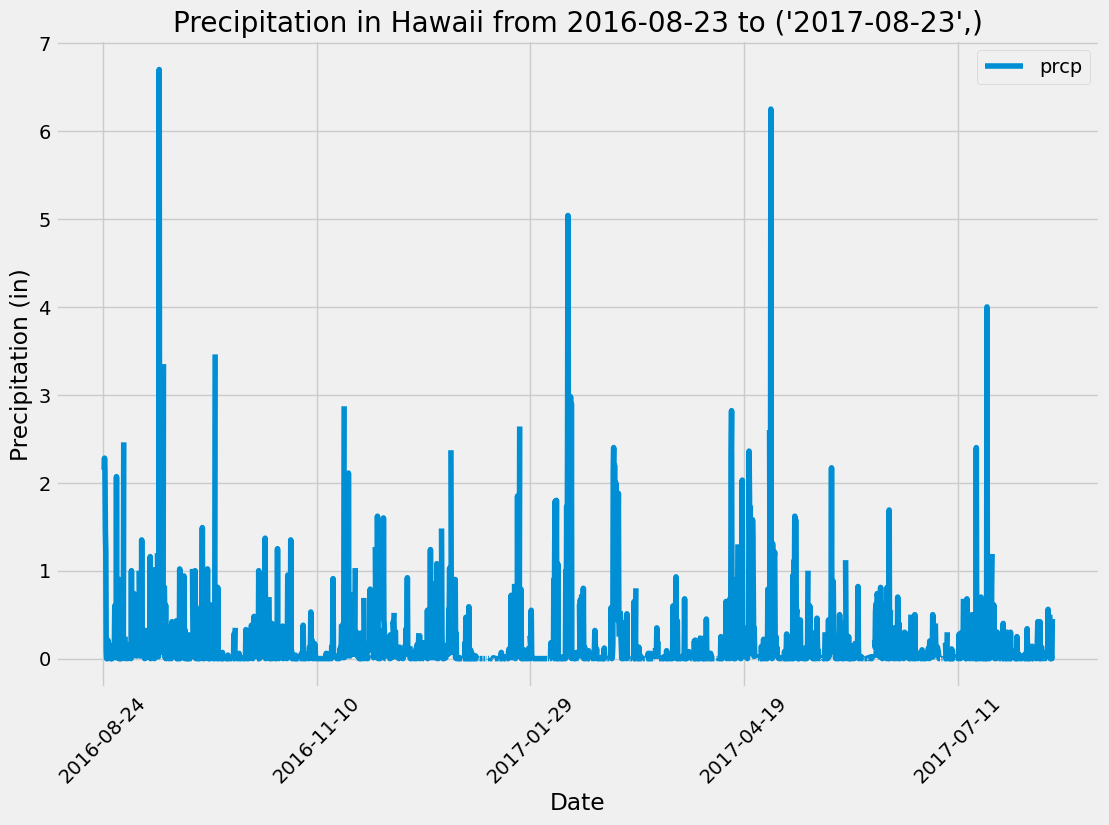

In [194]:
# Use Pandas Plotting with Matplotlib to plot the data
one_year_sorted.plot(figsize=(12,8), rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.title(f"Precipitation in Hawaii from {one_year} to {last_date}")
plt.show()

In [141]:
# Use Pandas to calcualte the summary statistics for the precipitation data
one_year_sorted.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [142]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).distinct().count()
print(total_stations)

9


In [155]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_list = session.query(station.station, func.count(measurement.station)).filter(station.station == measurement.station).group_by(station.station).order_by(func.count(measurement.station).desc()).all()
print(most_active_list)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [158]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(most_active_station)

[(54.0, 85.0, 71.66378066378067)]


In [185]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_most_active = session.query(measurement.tobs).filter(measurement.date.between(one_year,*last_date),measurement.station == 'USC00519281').all()
print(temp_most_active)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

Text(0.5, 1.0, "Temperature Observed at Station USC00519281 from 2016-08-23 to ('2017-08-23',)")

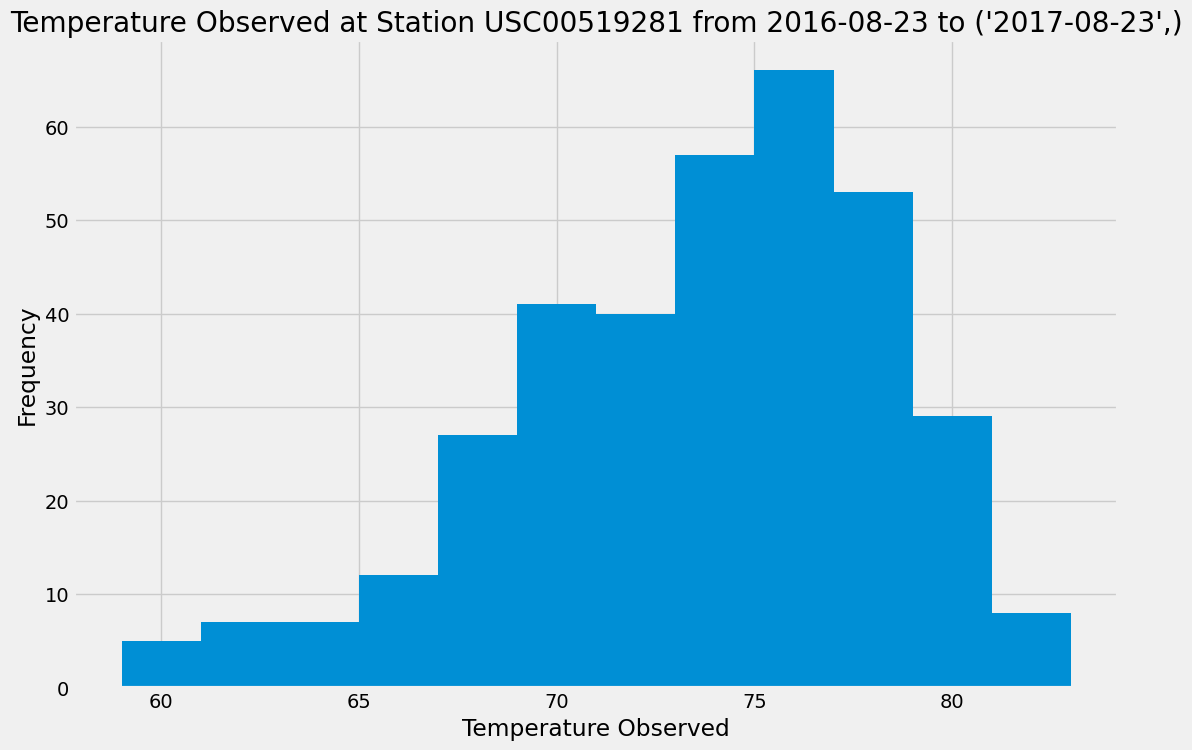

In [195]:
plt.figure(figsize=(12,8))
plt.hist(np.ravel(temp_most_active), bins=12)
plt.xlabel("Temperature Observed")
plt.ylabel("Frequency")
plt.title(f"Temperature Observed at Station USC00519281 from {one_year} to {last_date}")

# Close session

In [ ]:
# Close Session
session.close()